<a href="https://colab.research.google.com/github/ashishshaji/Natural_language_processing_projects/blob/master/Message-classification-BERT/simple_bert_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP using BERT

## About BERT 
Bidirectional Encoder Representations from Transformers (BERT) is a technique for NLP (Natural Language Processing) pre-training developed by Google. BERT was created and published in 2018 by Jacob Devlin and his colleagues from Google. **Google is leveraging BERT to better understand user searches.**
![](https://miro.medium.com/max/2960/0*63_xsVQp0Wezk9ua.jpg)
 

## About the dataset
Dataset consist of 747 spam messages are found out of 5572 messages



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [ ]:
sms=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin1')
sms = sms.iloc[:,[0,1]]

sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms.columns = ["label", "message"]
df=sms

In [ ]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


<h5>this is a cleaned dataset and no null values are present</h5>

In [ ]:
df.isnull().sum()

label      0
message    0
dtype: int64

## Data visualization

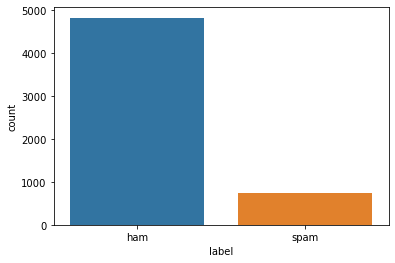

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="label", data=sms);
plt.show()

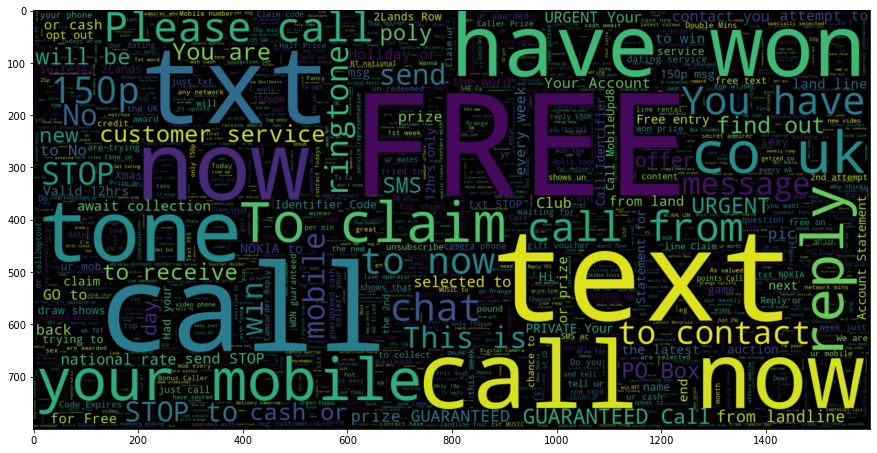

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (15,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(sms[sms.label == "spam"].message))
plt.imshow(wc , interpolation = 'bilinear')

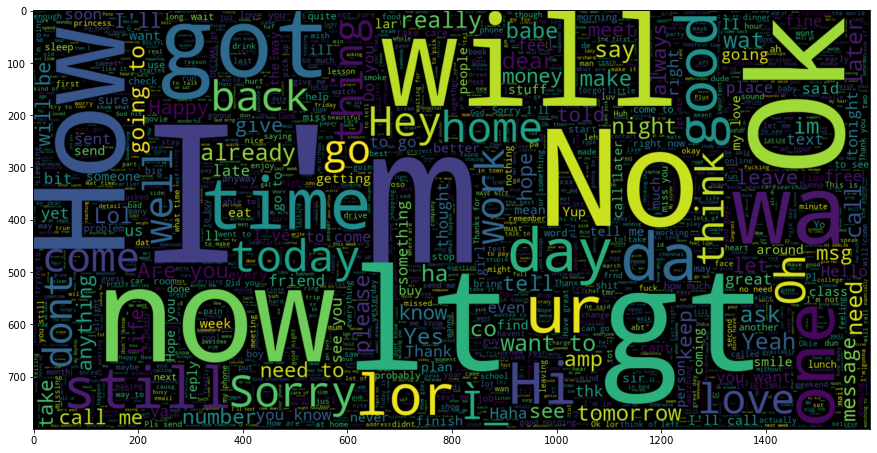

In [ ]:
plt.figure(figsize = (15,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(sms[sms.label == "ham"].message))
plt.imshow(wc , interpolation = 'bilinear')

## Data Preprocessing
We have to convert the raw messages (sequence of characters) into vectors (sequences of numbers).before that we need to do the following:

* Remove punctuation
* Remove numbers
* Remove tags
* Remove urls
* Remove stepwords
* Change the news to lower case
* Lemmatisation

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
import re

In [ ]:
def rem_punctuation(text):
  return text.translate(str.maketrans('','',string.punctuation))

def rem_numbers(text):
  return re.sub('[0-9]+','',text)


def rem_urls(text):
  return re.sub('https?:\S+','',text)


def rem_tags(text):
  return re.sub('<.*?>'," ",text)



df['message'].apply(rem_urls)
df['message'].apply(rem_punctuation)
df['message'].apply(rem_tags)
df['message'].apply(rem_numbers)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in  a wkly comp to win FA Cup final...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the nd time we have tried  contact u. ...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [ ]:
stop = set(stopwords.words('english'))

def rem_stopwords(df_news):
    
    words = [ch for ch in df_news if ch not in stop]
    words= "".join(words).split()
    words= [words.lower() for words in df_news.split()]
    
    return words    

df['message'].apply(rem_stopwords)

0       [go, until, jurong, point,, crazy.., available...
1                    [ok, lar..., joking, wif, u, oni...]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor..., u, c, already...
4       [nah, i, don't, think, he, goes, to, usf,, he,...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568       [will, ì_, b, going, to, esplanade, fr, home?]
5569    [pity,, *, was, in, mood, for, that., so...any...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                    [rofl., its, true, to, its, name]
Name: message, Length: 5572, dtype: object

In [ ]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
  lemmas = []
  for word in text.split():
    lemmas.append(lemmatizer.lemmatize(word))
  return " ".join(lemmas)


df['message'].apply(lemmatize_words)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he go to usf, he life around...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * wa in mood for that. So...any other su...
5570    The guy did some bitching but I acted like i'd...
5571                            Rofl. Its true to it name
Name: message, Length: 5572, dtype: object

In [ ]:
df.dtypes

label      object
message    object
dtype: object

In [ ]:
encode = ({'ham': 0, 'spam': 1} )
#new dataset with replaced values
df = df.replace(encode)

## What is BERT 

**BERT**:Bidirectional Encoder Representations from Transformers is a pretrained  NLP algorithm devolped by google AI wing.BERT 
is a bidirectionally trained so we can   have a deeper sense of language context and flow compared to the single-direction language models.Instead of predicting the next word in a sequence, BERT makes use of a novel technique called Masked LM (MLM): it randomly masks words in the sentence and then it tries to predict them. Unlike the previous language models, it takes both the previous and next tokens into account at the same time. The existing combined left-to-right and right-to-left LSTM based models were missing this “same-time part.

For more informatiom refer:https://towardsml.com/2019/09/17/bert-explained-a-complete-guide-with-theory-and-tutorial/


## How it works 
BERT relies on a Transformer (the attention mechanism that learns contextual relationships between words in a text). A basic Transformer consists of an encoder to read the text input and a decoder to produce a prediction for the task. Since BERT’s goal is to generate a language representation model, it only needs the encoder part. The input to the encoder for BERT is a sequence of tokens, which are first converted into vectors and then processed in the neural network. But before processing can start, BERT needs the input to be massaged and decorated with some extra metadata:

 Token embeddings: A [CLS] token is added to the input word tokens at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.
Segment embeddings: A marker indicating Sentence A or Sentence B is added to each token. This allows the encoder to distinguish between sentences.
Positional embeddings: A positional embedding is added to each token to indicate its position in the sentence.

In [ ]:
import keras
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras 
from keras import backend as K
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM,Dense,Bidirectional,Input
from keras.models import Model
from sklearn.model_selection import train_test_split
import transformers

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.message,df.label,random_state = 0,stratify = df.label)

In [ ]:
from tokenizers import BertWordPieceTokenizer
# First load the real tokenizer
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased' , lower = True)
# Save the loaded tokenizer locally
tokenizer.save_pretrained('.')
# Reload it with the huggingface tokenizers library
fast_tokenizer = BertWordPieceTokenizer('vocab.txt', lowercase=True)
fast_tokenizer

Tokenizer(vocabulary_size=30522, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=True, lowercase=True, wordpieces_prefix=##)

In [ ]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=400):

    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(max_length=maxlen)
    all_ids = []
    
    for i in range(0, len(texts), chunk_size):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)

In [ ]:
x_train = fast_encode(x_train.values, fast_tokenizer, maxlen=400)
x_test = fast_encode(x_test.values, fast_tokenizer, maxlen=400)

In [ ]:
def build_model(transformer, max_len=400):
    
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(cls_token)
    
    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(Adam(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
bert_model = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')

In [ ]:
model = build_model(bert_model, max_len=400)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 400)]             0         
_________________________________________________________________
tf_distil_bert_model (TFDist ((None, 400, 768),)       66362880  
_________________________________________________________________
tf_op_layer_strided_slice (T [(None, 768)]             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 769       
Total params: 66,363,649
Trainable params: 66,363,649
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 4)

Epoch 1/4
131/131 [==============================] - 114s 869ms/step - loss: 0.1420 - accuracy: 0.9438 - val_loss: 0.0336 - val_accuracy: 0.9914
Epoch 2/4
131/131 [==============================] - 112s 854ms/step - loss: 0.0314 - accuracy: 0.9911 - val_loss: 0.0264 - val_accuracy: 0.9907
Epoch 3/4
131/131 [==============================] - 112s 854ms/step - loss: 0.0126 - accuracy: 0.9955 - val_loss: 0.0256 - val_accuracy: 0.9899
Epoch 4/4
131/131 [==============================] - 112s 854ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0267 - val_accuracy: 0.9914


In [ ]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

44/44 [==============================] - 11s 245ms/step - loss: 0.0267 - accuracy: 0.9914
Accuracy of the model on Testing Data is -  99.13855195045471 %
